In [1]:

# 1. Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Clean Dataset
df = pd.read_csv("telco_clean.csv")
print("Dataset shape:", df.shape)
df.head()

# 3. Prepare Data for Tenure Prediction
y = df["tenure"]
X = df.drop(columns=["tenure", "ChurnFlag"])  

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(exclude=["number"]).columns.tolist()

print("Numeric columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))

# 4. Preprocessing Pipelines
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)

# 6. Baseline Model - Linear Regression
lin_reg = Pipeline([
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

print("\nLinear Regression Results:")
print(f"RMSE: {rmse_lin:.2f}")
print(f"R² Score: {r2_lin:.3f}")

# 7. Advanced Model - Gradient Boosting
gbr = Pipeline([
    ("preprocess", preprocess),
    ("model", GradientBoostingRegressor(random_state=42))
])

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("\nGradient Boosting Results:")
print(f"RMSE: {rmse_gbr:.2f}")
print(f"R² Score: {r2_gbr:.3f}")

# 8. Comparison Visualization
models = ["Linear Regression", "Gradient Boosting"]
rmse_scores = [rmse_lin, rmse_gbr]
r2_scores = [r2_lin, r2_gbr]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=rmse_scores)
plt.title("Tenure Model Comparison (Lower RMSE = Better)")
plt.ylabel("RMSE")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=r2_scores)
plt.title("Tenure Model Comparison (Higher R² = Better)")
plt.ylabel("R² Score")
plt.show()

# 9. Save Model Results
results = pd.DataFrame({
    "Model": models,
    "RMSE": rmse_scores,
    "R2_Score": r2_scores
})
results.to_csv("tenure_model_results.csv", index=False)
print("\nSaved: tenure_model_results.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'telco_clean.csv'

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=100, model__subsample=0.8; total time=   0.6s
[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=100, model__subsample=0.8; total time=   0.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=100, model__subsample=0.8; total time=   0.7s
[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=100, model__subsample=0.8; total time=   0.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=100, model__subsample=0.8; total time=   0.6s
[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=100, model__subsample=1.0; total time=   0.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=100, model__subsample=1.0; total time=   0.6s
[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=100, model__subsample=1.0; total time=   0.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=100, model__subsample=1.0; total time=   0.6s
[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=100, model__subsample=1.0; total time=   0.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=200, model__subsample=0.8; total time=   1.0s
[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=200, model__subsample=0.8; total time=   1.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=200, model__subsample=0.8; total time=   1.0s
[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=200, model__subsample=0.8; total time=   1.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=200, model__subsample=0.8; total time=   1.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=200, model__subsample=1.0; total time=   1.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=200, model__subsample=1.0; total time=   1.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=200, model__subsample=1.0; total time=   1.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=200, model__subsample=1.0; total time=   1.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=200, model__subsample=1.0; total time=   1.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=300, model__subsample=0.8; total time=   1.4s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=300, model__subsample=0.8; total time=   1.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=300, model__subsample=0.8; total time=   1.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=300, model__subsample=0.8; total time=   1.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=300, model__subsample=0.8; total time=   1.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=300, model__subsample=1.0; total time=   1.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=300, model__subsample=1.0; total time=   1.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=300, model__subsample=1.0; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=300, model__subsample=1.0; total time=   1.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=2, model__n_estimators=300, model__subsample=1.0; total time=   1.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.3s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.3s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.3s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=300, model__subsample=0.8; total time=   2.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=300, model__subsample=0.8; total time=   2.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=300, model__subsample=0.8; total time=   2.3s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=300, model__subsample=0.8; total time=   2.3s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=300, model__subsample=0.8; total time=   2.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=300, model__subsample=1.0; total time=   2.3s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=300, model__subsample=1.0; total time=   2.3s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=300, model__subsample=1.0; total time=   2.4s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=300, model__subsample=1.0; total time=   2.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=300, model__subsample=1.0; total time=   2.4s
[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=100, model__subsample=0.8; total time=   0.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=100, model__subsample=0.8; total time=   0.9s
[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=100, model__subsample=0.8; total time=   0.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=100, model__subsample=0.8; total time=   0.9s
[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=100, model__subsample=0.8; total time=   0.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=100, model__subsample=1.0; total time=   1.1s
[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=100, model__subsample=1.0; total time=   1.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=100, model__subsample=1.0; total time=   1.0s
[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=100, model__subsample=1.0; total time=   1.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=100, model__subsample=1.0; total time=   1.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=200, model__subsample=0.8; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=200, model__subsample=0.8; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=200, model__subsample=0.8; total time=   1.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=200, model__subsample=0.8; total time=   1.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=200, model__subsample=0.8; total time=   1.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=200, model__subsample=1.0; total time=   2.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=200, model__subsample=1.0; total time=   2.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=200, model__subsample=1.0; total time=   2.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=200, model__subsample=1.0; total time=   2.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=200, model__subsample=1.0; total time=   1.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=300, model__subsample=0.8; total time=   2.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=300, model__subsample=0.8; total time=   2.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=300, model__subsample=0.8; total time=   2.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=300, model__subsample=0.8; total time=   2.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=300, model__subsample=0.8; total time=   2.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=300, model__subsample=1.0; total time=   3.4s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=300, model__subsample=1.0; total time=   2.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=300, model__subsample=1.0; total time=   2.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=300, model__subsample=1.0; total time=   2.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=100, model__subsample=0.8; total time=   0.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=100, model__subsample=0.8; total time=   0.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=100, model__subsample=0.8; total time=   0.5s
[CV] END model__learning_rate=0.05, model__max_depth=4, model__n_estimators=300, model__subsample=1.0; total time=   3.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=100, model__subsample=0.8; total time=   0.5s
[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=100, model__subsample=0.8; total time=   0.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=100, model__subsample=1.0; total time=   0.6s
[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=100, model__subsample=1.0; total time=   0.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=100, model__subsample=1.0; total time=   0.6s
[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=100, model__subsample=1.0; total time=   0.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=100, model__subsample=1.0; total time=   0.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=200, model__subsample=0.8; total time=   1.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=200, model__subsample=0.8; total time=   1.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=200, model__subsample=0.8; total time=   1.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=200, model__subsample=0.8; total time=   1.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=200, model__subsample=0.8; total time=   1.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=200, model__subsample=1.0; total time=   1.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=200, model__subsample=1.0; total time=   1.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=200, model__subsample=1.0; total time=   1.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=200, model__subsample=1.0; total time=   1.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=200, model__subsample=1.0; total time=   1.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=300, model__subsample=0.8; total time=   1.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=300, model__subsample=0.8; total time=   1.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=300, model__subsample=0.8; total time=   1.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=300, model__subsample=0.8; total time=   1.4s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=300, model__subsample=0.8; total time=   1.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=300, model__subsample=1.0; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=300, model__subsample=1.0; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=300, model__subsample=1.0; total time=   1.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=300, model__subsample=1.0; total time=   1.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.7s
[CV] END model__learning_rate=0.1, model__max_depth=2, model__n_estimators=300, model__subsample=1.0; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.7s
[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.7s
[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.8s
[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.4s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.3s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.3s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.4s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.4s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=300, model__subsample=0.8; total time=   2.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=300, model__subsample=0.8; total time=   2.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=300, model__subsample=0.8; total time=   2.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=300, model__subsample=0.8; total time=   2.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=300, model__subsample=0.8; total time=   2.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=300, model__subsample=1.0; total time=   2.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=300, model__subsample=1.0; total time=   2.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=300, model__subsample=1.0; total time=   2.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=300, model__subsample=1.0; total time=   2.3s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=300, model__subsample=1.0; total time=   2.5s
[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=100, model__subsample=0.8; total time=   1.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=100, model__subsample=0.8; total time=   0.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=100, model__subsample=0.8; total time=   1.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=100, model__subsample=0.8; total time=   1.0s
[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=100, model__subsample=0.8; total time=   0.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=100, model__subsample=1.0; total time=   1.1s
[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=100, model__subsample=1.0; total time=   1.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=100, model__subsample=1.0; total time=   1.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=100, model__subsample=1.0; total time=   1.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=100, model__subsample=1.0; total time=   1.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=200, model__subsample=0.8; total time=   1.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=200, model__subsample=0.8; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=200, model__subsample=0.8; total time=   1.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=200, model__subsample=0.8; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=200, model__subsample=0.8; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=200, model__subsample=1.0; total time=   2.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=200, model__subsample=1.0; total time=   2.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=200, model__subsample=1.0; total time=   2.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=200, model__subsample=1.0; total time=   2.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=200, model__subsample=1.0; total time=   2.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=300, model__subsample=0.8; total time=   2.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=300, model__subsample=0.8; total time=   2.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=300, model__subsample=0.8; total time=   2.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=300, model__subsample=0.8; total time=   2.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=300, model__subsample=0.8; total time=   2.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=300, model__subsample=1.0; total time=   3.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=300, model__subsample=1.0; total time=   2.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=300, model__subsample=1.0; total time=   3.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=300, model__subsample=1.0; total time=   3.4s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=100, model__subsample=0.8; total time=   0.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=100, model__subsample=0.8; total time=   0.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.1, model__max_depth=4, model__n_estimators=300, model__subsample=1.0; total time=   3.2s
[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=100, model__subsample=0.8; total time=   0.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=100, model__subsample=0.8; total time=   0.6s
[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=100, model__subsample=0.8; total time=   0.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=100, model__subsample=1.0; total time=   0.6s
[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=100, model__subsample=1.0; total time=   0.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=100, model__subsample=1.0; total time=   0.7s
[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=100, model__subsample=1.0; total time=   0.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=100, model__subsample=1.0; total time=   0.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=200, model__subsample=0.8; total time=   1.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=200, model__subsample=0.8; total time=   1.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=200, model__subsample=0.8; total time=   1.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=200, model__subsample=0.8; total time=   1.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=200, model__subsample=0.8; total time=   1.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=200, model__subsample=1.0; total time=   1.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=200, model__subsample=1.0; total time=   1.3s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=200, model__subsample=1.0; total time=   1.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=200, model__subsample=1.0; total time=   1.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=200, model__subsample=1.0; total time=   1.3s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=300, model__subsample=0.8; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=300, model__subsample=0.8; total time=   1.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=300, model__subsample=0.8; total time=   1.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=300, model__subsample=0.8; total time=   1.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=300, model__subsample=0.8; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=300, model__subsample=1.0; total time=   1.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=300, model__subsample=1.0; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=300, model__subsample=1.0; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=300, model__subsample=1.0; total time=   1.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.2, model__max_depth=2, model__n_estimators=300, model__subsample=1.0; total time=   1.8s
[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.8s
[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   1.0s
[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.8s
[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.8s
[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.4s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.3s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=200, model__subsample=0.8; total time=   1.4s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=200, model__subsample=1.0; total time=   1.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=300, model__subsample=0.8; total time=   2.3s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=300, model__subsample=0.8; total time=   2.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=300, model__subsample=0.8; total time=   2.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=300, model__subsample=0.8; total time=   2.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=300, model__subsample=0.8; total time=   2.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=300, model__subsample=1.0; total time=   2.4s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=300, model__subsample=1.0; total time=   2.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=300, model__subsample=1.0; total time=   2.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=300, model__subsample=1.0; total time=   2.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=100, model__subsample=0.8; total time=   0.9s
[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=300, model__subsample=1.0; total time=   2.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=100, model__subsample=0.8; total time=   0.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=100, model__subsample=0.8; total time=   1.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=100, model__subsample=0.8; total time=   1.0s
[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=100, model__subsample=0.8; total time=   0.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=100, model__subsample=1.0; total time=   1.0s
[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=100, model__subsample=1.0; total time=   1.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At le

[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=100, model__subsample=1.0; total time=   1.0s
[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=100, model__subsample=1.0; total time=   1.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=100, model__subsample=1.0; total time=   1.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=200, model__subsample=0.8; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=200, model__subsample=0.8; total time=   1.9s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=200, model__subsample=0.8; total time=   1.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=200, model__subsample=0.8; total time=   1.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=200, model__subsample=0.8; total time=   1.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=200, model__subsample=1.0; total time=   2.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=200, model__subsample=1.0; total time=   2.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=200, model__subsample=1.0; total time=   2.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=200, model__subsample=1.0; total time=   2.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=200, model__subsample=1.0; total time=   2.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=300, model__subsample=0.8; total time=   2.5s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=300, model__subsample=0.8; total time=   2.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=300, model__subsample=0.8; total time=   2.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=300, model__subsample=0.8; total time=   2.7s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=300, model__subsample=0.8; total time=   2.6s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=300, model__subsample=1.0; total time=   3.2s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=300, model__subsample=1.0; total time=   3.0s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=300, model__subsample=1.0; total time=   2.8s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=300, model__subsample=1.0; total time=   3.1s


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


[CV] END model__learning_rate=0.2, model__max_depth=4, model__n_estimators=300, model__subsample=1.0; total time=   2.5s

Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 2, 'model__n_estimators': 200, 'model__subsample': 0.8}
Best R² Score (CV average): 0.639

Tuned Gradient Boosting Results:
RMSE: 14.34
R² Score: 0.673


/home/codespace/.local/lib/python3.12/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['MonthlyCharges' 'TotalCharges']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


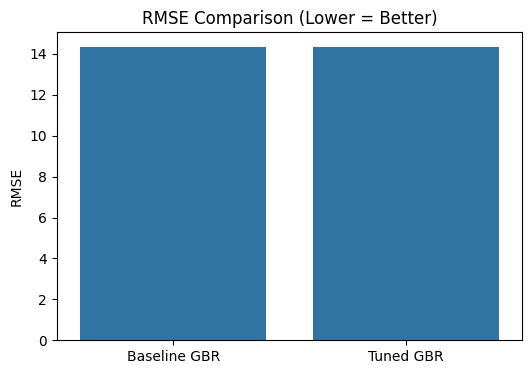

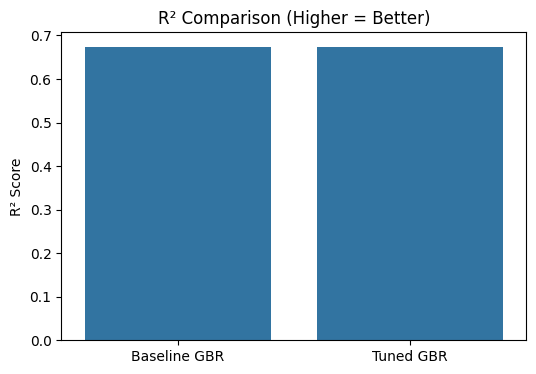

In [ ]:
from sklearn.model_selection import GridSearchCV

# 10. Hyperparameter Tuning - Gradient Boosting

# Define parameter grid
param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__learning_rate": [0.05, 0.1, 0.2],
    "model__max_depth": [2, 3, 4],
    "model__subsample": [0.8, 1.0]
}

# Create pipeline again for clarity
gbr_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", GradientBoostingRegressor(random_state=42))
])

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr_pipe,
    param_grid=param_grid,
    scoring="r2",        
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print(f"Best R² Score (CV average): {grid_search.best_score_:.3f}")


# 11. Evaluate Tuned Model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("\nTuned Gradient Boosting Results:")
print(f"RMSE: {rmse_best:.2f}")
print(f"R² Score: {r2_best:.3f}")

# 12. Visualization
models = ["Baseline GBR", "Tuned GBR"]
rmse_scores = [rmse_gbr, rmse_best]
r2_scores = [r2_gbr, r2_best]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=rmse_scores)
plt.title("RMSE Comparison (Lower = Better)")
plt.ylabel("RMSE")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=r2_scores)
plt.title("R² Comparison (Higher = Better)")
plt.ylabel("R² Score")
plt.show()


In [ ]:
!pip install xgboost -q



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
# Ensure all features are numeric
X_train = X_train.copy()
X_test = X_test.copy()

# Convert object columns to numeric using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns between train and test sets (in case dummies mismatch)
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

print("All columns are now numeric. Shape:", X_train.shape)


All columns are now numeric. Shape: (5634, 29)


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))


XGBoost RMSE: 14.539910473659432
XGBoost R²: 0.6642137765884399


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 6],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² (CV):", grid_search.best_score_)

best_xgb = grid_search.best_estimator_

# Evaluate on test set
y_pred_best = best_xgb.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Test R²:", r2_score(y_test, y_pred_best))


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best R² (CV): 0.6376851797103882
Test RMSE: 14.344674938689955
Test R²: 0.673170804977417


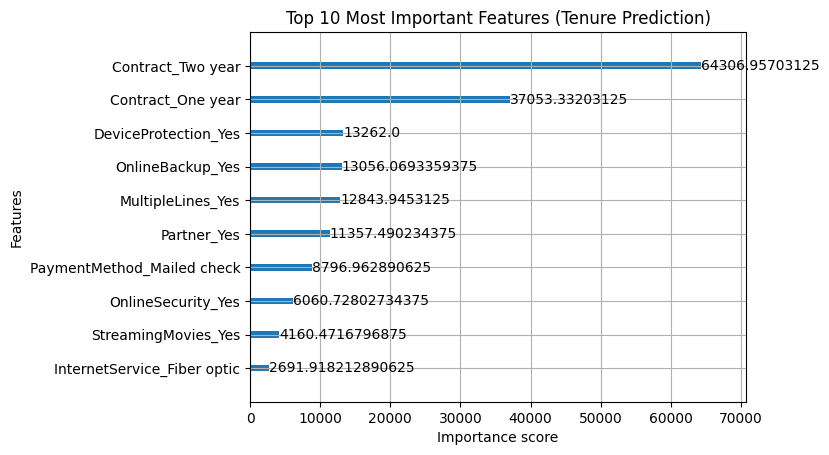

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_xgb, max_num_features=10, importance_type='gain')
plt.title("Top 10 Most Important Features (Tenure Prediction)")
plt.show()
